In [1]:
using Distributed
addprocs(44);

### Fitting a choice model.

First you have to include the necessary package

In [2]:
using pulse_input_DDM, Flatten

### Geneerate some data
Blah blah blah

In [3]:
θ_syn = θchoice(θz=θz(σ2_i = 1., B = 13., λ = -0.5, σ2_a = 10., σ2_s = 1.0,
    ϕ = 0.4, τ_ϕ = 0.02), bias=0.1, lapse=0.1);

In [21]:
_, data = synthetic_data(;θ=θ_syn, ntrials=20_000, rng=1, dt=2e-2);

In [22]:
n = 53

53

In [23]:
loglikelihood(θ_syn, data, n)

-7584.3319152221975

In [24]:
using Random

In [25]:
fit = vcat(trues(7),falses(2),trues(2));
x0 = vcat([0.1, 15., -0.1, 20., 0.5, 0.2, 0.008,0.,0.], [0.,0.01])
lb=vcat([0., 8., -5., 0.,   0.,  0.01, 0.005, -30., -30.], [-5., 0.])
ub=vcat([2., 30., 5., 100., 2.5, 1.2,  1.,     30., 30.], [5., 1.]);

In [30]:
function fit_x0(rng, fit, x0, lb, ub, data, n)

    Random.seed!(rng)
    x00 = lb + (ub - lb) .* rand(length(x0))
    x00[2] = 15.
    x00[8:9] .= 0.;

    options = choiceoptions(x0=x00, fit=fit, 
        lb=vcat([0.,  8., -5., 0.,   0.,  0.01, 0.005, -30., -30.], [-5., 0.]),
        ub=vcat([30., 32., 5., 200., 5.,  1.2,  1.,     30.,  30.],  [5., 1.]))

    model, output = optimize(data, options, n; f_tol=1e-9, extended_trace=true, show_trace=false, scaled=false)
    
end

fit_x0 (generic function with 1 method)

In [ ]:
output = map(rng-> fit_x0(rng,fit, x0, lb, ub, data, n), 1:4)

In [ ]:
traces = map(y-> hcat(map(x-> x.metadata["x"], y[2].trace)...), output)

In [17]:
#map(x-> θchoice(x[1:7,end], x[8,end], x[9,end]), traces[[1,3]])

In [ ]:
#loglikelihood(θ_syn, data, n)

In [ ]:
#output.initial_x

In [ ]:
#results = hcat(map(x-> x.metadata["x"], output.trace)...)

In [14]:
using JLD

In [64]:
abs(1. - 1. * 1.4)

0.3999999999999999

In [66]:
abs(1. - 1. * 0.6)

0.4

In [190]:
#traces = Vector{Array{Float64,2}}(undef,10)
#for i = 1:10
#    @load "/usr/people/briandd/example_"*string(i)*".jld" trace
#    traces[i] = trace
#end

In [18]:
using PyPlot

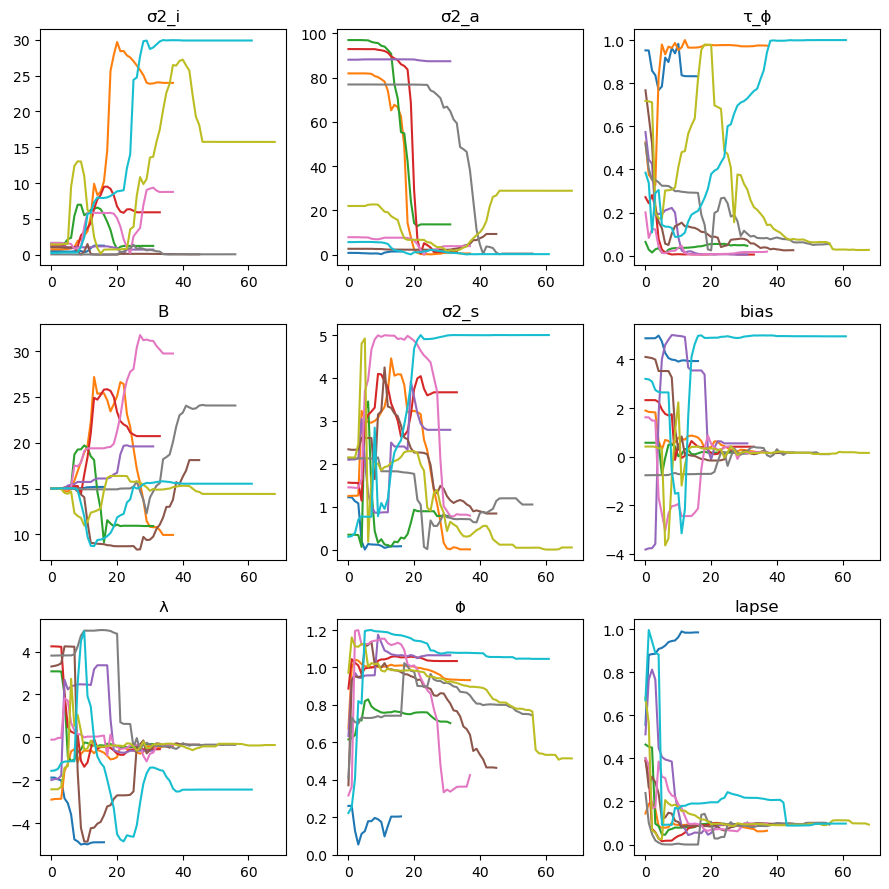

In [29]:
num_rows, num_cols = 3,3
fig, ax = subplots(num_rows, num_cols, figsize=(9,9))
name = ["σ2_i", "B", "λ", "σ2_a", "σ2_s", "ϕ", "τ_ϕ", "bias", "lapse"]
id = 1

for i in 1:9
                  
    map(x-> ax[i].plot(x[i,:]), traces)
    ax[i].set_title(name[i])
end

tight_layout() 

In [91]:
abs(1. - 1. * 0.9)

0.09999999999999998

In [92]:
abs(1. - 1. * 1.1)

0.10000000000000009

In [121]:
exp(log(1. - 1. * 0.9))

0.09999999999999998

In [120]:
exp(log(Complex(1. - 1. * 1.1)))

-0.10000000000000006 + 1.2246467991473539e-17im

In [124]:
using StatsFuns: xlogy

In [125]:
ici = diff(L)

20-element Array{Float64,1}:
 0.04493732716079495  
 0.006787804508223173 
 0.007860411993734731 
 0.002311769352086261 
 0.0017663379041122848
 0.03289947888352862  
 0.031018339580117238 
 0.0015123980455404307
 0.016508322887999416 
 0.0024143647782179645
 0.02263596855698355  
 0.09707481831187217  
 0.014822972781030452 
 0.032013489500425873 
 0.004366034580432665 
 0.008855970029352345 
 0.03590464401897547  
 0.013171762744933702 
 0.008703471146099484 
 0.0020300016537920795

In [151]:
τ_ϕ = 0.2

0.2

In [156]:
arg1 = (-ici[1] + τ_ϕ * log(Complex(1. - 1. * 0.8)))/τ_ϕ

-1.8341245482380755 + 0.0im

In [157]:
1. - exp(arg1)

0.8402467031275254 - 0.0im

In [158]:
arg2 = (-ici[1] + τ_ϕ * log(Complex(1. - 1. * 1.2)))/τ_ϕ

-1.8341245482380755 + 3.141592653589793im

In [164]:
exp(im * pi)

-1.0 + 1.2246467991473532e-16im

In [165]:
1. + exp(arg1)

1.1597532968724746 + 0.0im

In [166]:
1. - exp(arg2)

1.1597532968724746 - 1.9564136366811295e-17im

In [174]:
τ_ϕ, ϕ = 0.02, 1.2

(0.02, 1.2)

In [175]:
La = ones(length(L));

In [176]:
ici = diff(L)

for i = 1:length(ici)

    arg = (1/τ_ϕ) * (-ici[i] + xlogy(τ_ϕ, abs(1. - La[i]* ϕ)))

    if La[i]* ϕ <= 1
        La[i+1] = 1. - exp(arg)
    else
        La[i+1] = 1. + exp(arg)
    end

end

In [177]:
La

21-element Array{Float64,1}:
 1.0               
 1.0211460052061025
 1.16051323034703  
 1.2650215439228047
 1.461479061374706 
 1.690058828158778 
 1.1984357103789156
 1.092905456296008 
 1.2888005319645115
 1.2394223422312545
 1.4318920562351087
 1.2316083424345363
 1.0037274463909367
 1.097444889641929 
 1.0639447006456741
 1.2224614279155346
 1.2998947670816197
 1.0929888002275825
 1.1612714619970614
 1.254671112538278 
 1.4568048666160036

In [178]:
La2 = ones(length(L));

In [181]:
ici = diff(L)

for i = 1:length(ici)

    arg = (1/τ_ϕ) * (-ici[i] + τ_ϕ * log(complex(1. - La2[i]* ϕ)))
    La2[i+1] = real(1. - exp(arg))

end

In [183]:
La2 - La

21-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [93]:
L,R = data[1].click_data.clicks.L, data[1].click_data.clicks.R

([0.0, 0.04493732716079495, 0.051725131669018126, 0.05958554366275286, 0.06189731301483912, 0.0636636509189514, 0.09656312980248002, 0.12758146938259726, 0.1290938674281377, 0.1456021903161371  …  0.17065252365133862, 0.2677273419632108, 0.28255031474424125, 0.3145638042446671, 0.3189298388250998, 0.32778580885445213, 0.3636904528734276, 0.3768622156183613, 0.3855656867644608, 0.38759568841825287], [0.0, 0.02242497544320737, 0.04515810771517595, 0.054728520875007985, 0.20252473678806523, 0.27893257745363303, 0.2797621297828851, 0.3622987573252388])

In [94]:
La1, Ra1 = pulse_input_DDM.adapt_clicks(0.9, 0.008, 
    data[1].click_data.clicks.L, data[1].click_data.clicks.R)

([1.0, 0.9996365071707312, 0.9570532610701037, 0.9480949459164135, 0.8901058440205571, 0.8405016175888129, 0.9960136284856431, 0.9978550280376667, 0.9156275264829259, 0.9776556044070785  …  0.9893759918927276, 0.9999994114597706, 0.9843212877410487, 0.9979135082266612, 0.9409715133830071, 0.9493842651251373, 0.9983636506439744, 0.9804432675932558, 0.9603788071266439, 0.8947440798085189], [1.0, 0.9939379486125018, 0.9938487776857957, 0.9680953607488882, 0.9999999987803331, 0.9999928868485128, 0.9098441209918985, 0.9999940108550469])

In [95]:
La2, Ra2 = pulse_input_DDM.adapt_clicks(1.1, 0.008, L, R)

([1.0, 0.9996365071707312, 0.9573644596369061, 0.9801214256971019, 0.9414753164162969, 0.9714346343318859, 0.9988775224406655, 0.9979548858139065, 0.9190875850046151, 0.9986034255066002  …  0.998824708801177, 0.9999994697673061, 0.9843214622351247, 0.9984868683667573, 0.943023930852968, 0.9876617701546226, 0.9990283595168536, 0.9809330919399539, 0.9733750673368187, 0.9451351328285512], [1.0, 0.9939379486125018, 0.9945559746234918, 0.9715793430828326, 0.9999999993486608, 0.9999928868486418, 0.9098569460192302, 0.9999999721392916])

In [96]:
Ra1 - Ra2

8-element Array{Float64,1}:
  0.0                  
  0.0                  
 -0.000707196937696053 
 -0.0034839823339443132
 -5.683277182200186e-10
 -1.290079154614432e-13
 -1.2825027331686556e-5
 -5.961284244682119e-6 

## Reverse mode

In [104]:
using Zygote

┌ Info: Recompiling stale cache file /usr/people/briandd/.julia/compiled/v1.2/Zygote/4kbLI.ji for Zygote [e88e6eb3-aa80-5325-afca-941959d7151f]
└ @ Base loading.jl:1240


In [105]:
traces[1]

9×240 Array{Float64,2}:
  0.472067   0.472206   0.46982    0.466091  …  10.9887       10.9887     
 15.0       15.0       15.0013    15.002        56.1401       56.1401     
 -1.87293   -1.87229   -1.97288   -2.03806      -0.493637     -0.493637   
  0.790928   0.79109    0.777284   0.767792      1.02139e-11   1.02217e-11
  1.22153    1.22221    1.11589    1.05309       0.000146905   0.000146684
  0.261052   0.262349   0.102158   0.043804  …   0.535829      0.535829   
  0.952157   0.951511   0.8578     0.962402      0.0309048     0.030905   
  4.86666    4.86618    4.87329    4.88406       0.144762      0.144762   
  0.555751   0.90129    0.912848   0.917142      0.10905       0.10905    

In [106]:
ℓℓ(x) = -loglikelihood(x, data, n)
#ForwardDiff.gradient(ℓℓ, x)

ℓℓ (generic function with 1 method)

In [113]:
Zygote.gradient(x-> ℓℓ(x), collect(Flatten.flatten(θ_syn)))

Zygote.CompileError: Compiling Tuple{typeof(Base.maptwice),getfield(Base, Symbol("##696#698")){Channel{Any},Array{Any,1},getfield(Distributed, Symbol("##214#217")){WorkerPool},getfield(Base, Symbol("##689#694")){getfield(Distributed, Symbol("##198#200")){getfield(Distributed, Symbol("###198#199#201")){WorkerPool,getfield(pulse_input_DDM, Symbol("##70#71")){θchoice{θz{Float64},Float64},Int64,Array{Float64,1},Array{Float64,2},Array{Float64,1},Float64}}}},getfield(Base, Symbol("##695#697")){Channel{Any}}},Channel{Any},Array{Any,1},Array{choicedata{pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}},1}}: try/catch is not supported.

### Compute Hessian
Blah blah blah

In [42]:
H = Hessian(model, n)
CI, HPSD = CIs(H);

┌ Warning: Hessian is not positive definite. Approximated by closest PSD matrix.
│             ||ϵ||/||H|| is 0.223694523778866
└ @ pulse_input_DDM /usr/people/briandd/Projects/pulse_input_DDM/src/base_model.jl:19


In [43]:
CI

11-element Array{Float64,1}:
 11.650158965965602   
 50.08465038997119    
  0.9794250017826648  
 20.071962630628775   
  0.8280034436388295  
  0.15319607993220483 
  0.009740611905573246
  2.0                 
  2.0                 
  0.17024446361358803 
  0.01086344275122942 

In [44]:
hcat(collect(Flatten.flatten(model.θ)) - CI, collect(Flatten.flatten(θ_syn)), collect(Flatten.flatten(model.θ)) + CI)

11×3 Array{Float64,2}:
 -10.7113       1.0   12.5891   
 -38.3492      13.0   61.8201   
  -1.35075     -0.5    0.608102 
  -8.53344     10.0   31.6105   
   0.0395871    1.0    1.69559  
   0.281214     0.4    0.587606 
   0.0129646    0.02   0.0324458
  -2.0          0.0    2.0      
  -2.0          0.0    2.0      
  -0.00742028   0.1    0.333069 
   0.0865729    0.1    0.1083   

In [45]:
hcat(collect(Flatten.flatten(model.θ)), collect(Flatten.flatten(θ_syn)))

11×2 Array{Float64,2}:
  0.938897    1.0 
 11.7354     13.0 
 -0.371323   -0.5 
 11.5385     10.0 
  0.867591    1.0 
  0.43441     0.4 
  0.0227052   0.02
  0.0         0.0 
  0.0         0.0 
  0.162824    0.1 
  0.0974364   0.1 

In [46]:
hcat(collect(Flatten.flatten(model.θ)) - CI .< collect(Flatten.flatten(θ_syn)) .< collect(Flatten.flatten(model.θ)) + CI)

11×1 BitArray{2}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1